In [1]:
# -----********************-----

# Created Time: 2024/12/09

# Last updated: 2024/12/11

# Author: Tara Liu, Yiyi He

### Use Case

# This notebook explores the application of autoregressive models
# 1. 

# -----********************-----

In [29]:
# Import libraries
import os
# Stats
from statsmodels.tsa.api import ARDL
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.api import VAR

# Geo
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 1000

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Processing
from tqdm import tqdm

In [18]:
# Define functions
def find_lag(df, maxlag):

    print(f'testing maxlag: {maxlag}')
    time_start = pd.Timestamp.now()
    
    sel_res = ardl_select_order(
        df['pct_blackout'],
        exog=df[['t2m', 'wind_speed', 'tp', 'wind_forest_cover']],
        maxlag=maxlag,
        ic='aic',
        maxorder=maxlag
        )
    
    time_selected = pd.Timestamp.now()
    print(f'time elapsed for selecting order: {time_selected-time_start}')
    
    return sel_res.model.ardl_order

In [10]:
# Load input dataframe
df_518 = pd.read_csv("/Users/yiyi/Desktop/df_for_model.csv")
df_518.head(3)

,datetime,pct_blackout,wind_forest_cover,t2m,tp,wind_speed,station_id,climate_zone_code
0,2014-11-17 17:00:00,0.0,0.0,295.09723,5.645638e-04,1.310930,495,Aw
1,2014-11-29 17:00:00,0.0,0.0,293.04870,0.000000e+00,2.215274,495,Aw
2,2014-11-30 22:00:00,0.0,0.0,289.83447,4.351137e-07,2.000125,495,Aw


# FIND LAG

In [19]:
# Testing on a small selection of stations
station_id = 232
station_df = df_518[df_518['station_id'] == station_id]

find_lag(station_df, 5)

testing maxlag: 5


/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


time elapsed for selecting order: 0 days 00:01:48.567541


/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


(4, 0, 1, 0)

In [14]:
# Testing on a small selection of stations
station_id = 125
station_df = df_518[df_518['station_id'] == station_id]
station_df['datetime'] = pd.to_datetime(station_df['datetime'])

find_lag(station_df, 5)

/var/folders/cy/f8598vm53cggn74m01d5s0rc0000gr/T/ipykernel_11971/1606503971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['datetime'] = pd.to_datetime(station_df['datetime'])
/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


testing maxlag: 5
time elapsed for selecting order: 0 days 00:00:06.487432


/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


(1, 0, 2, 0)

In [15]:
# Testing on a small selection of stations
station_id = 161
station_df = df_518[df_518['station_id'] == station_id]
station_df['datetime'] = pd.to_datetime(station_df['datetime'])

find_lag(station_df, 5)

/var/folders/cy/f8598vm53cggn74m01d5s0rc0000gr/T/ipykernel_11971/3200358933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['datetime'] = pd.to_datetime(station_df['datetime'])
/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


testing maxlag: 5
time elapsed for selecting order: 0 days 00:00:05.999313


/Applications/anaconda3/envs/india0/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


(1, 0, 0)

In [16]:
station_df

,datetime,pct_blackout,wind_forest_cover,t2m,tp,wind_speed,station_id,climate_zone_code
1986470,2017-02-19 22:00:00,0.0,0.0,294.11145,0.000090,2.139648,161,Cw
1986471,2017-07-19 05:00:00,0.0,0.0,301.82373,0.001552,3.836079,161,Cw
1986472,2017-04-05 17:00:00,0.0,0.0,294.18164,0.001013,1.492432,161,Cw
1986473,2017-05-24 05:00:00,0.0,0.0,302.63574,0.000387,1.400901,161,Cw
1986474,2017-06-06 17:00:00,0.0,0.0,301.64160,0.001015,0.835790,161,Cw
...,...,...,...,...,...,...,...,...
6081817,2016-12-19 04:00:00,0.0,0.0,293.43756,0.000324,0.384419,161,Cw
6081818,2016-12-27 04:00:00,0.0,0.0,293.23242,0.000004,2.400838,161,Cw
6081819,2016-12-19 13:00:00,0.0,0.0,293.49854,0.000932,0.653509,161,Cw
6081820,2016-12-27 13:00:00,0.0,0.0,291.67120,0.000136,2.042875,161,Cw


# VAR

In [46]:
from statsmodels.tsa.api import VAR

station_df_arr = np.array(station_df[['pct_blackout', 't2m', 'wind_speed', 'tp', 'wind_forest_cover']])
model_var = VAR(station_df_arr)

In [53]:
model_var.select_order(15)
results = model_var.fit(maxlags=15, ic='aic')
# results.summary()


LinAlgError: 5-th leading minor of the array is not positive definite

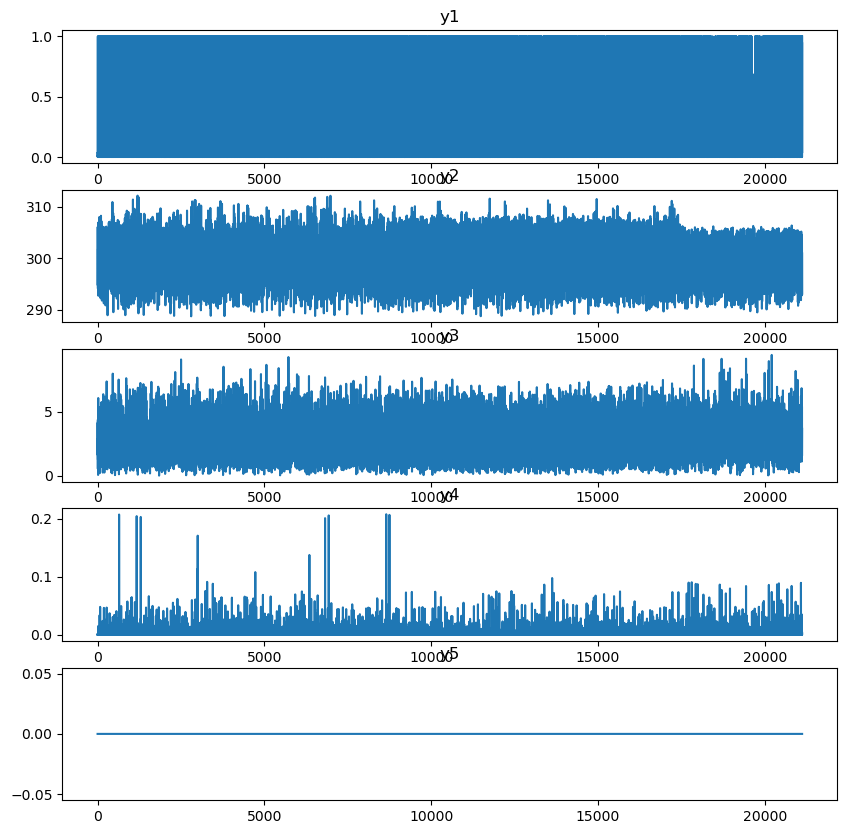

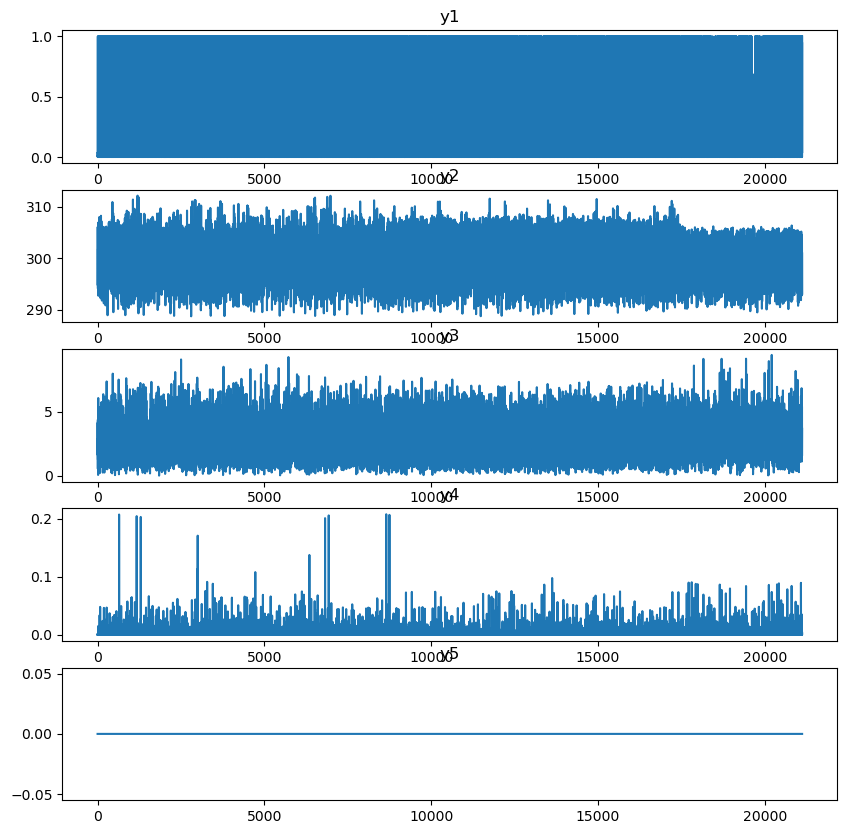

In [50]:
results.plot()